## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [45]:
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import graphviz

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [46]:
df = pd.read_csv('housing.csv')
df = df.dropna()
X = df.drop(columns=['median_house_value']).copy()
X = pd.get_dummies(X, drop_first=True)
y = df.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2360873)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=2)

In [47]:
y_train_pred1 = regr_1.predict(X_train) 
y_test_pred1 = regr_1.predict(X_test) 




### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [48]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities1 = path.ccp_alphas, path.impurities

ccp_alphas

array([0.00000000e+00, 7.43484913e+08, 1.63938270e+09, 4.16922448e+09])

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [49]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [51]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

print('## MSE ##')
print(train_scores)
print(test_scores)



## MSE ##
[0.0, 6747664717.614827, 9130532332.318542, 13299756810.515352]
[4505734930.828146, 6743893209.801137, 9367161016.734108, 13399765275.75297]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

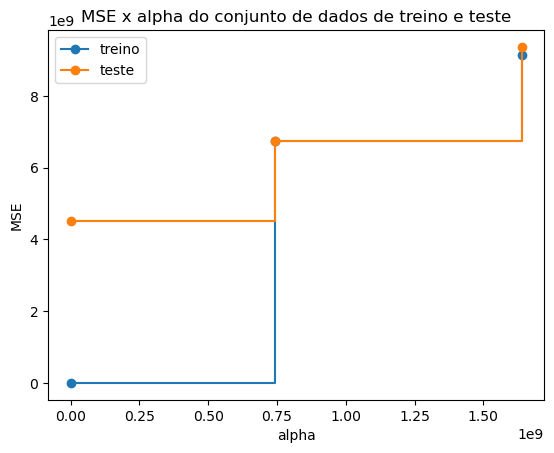

In [52]:

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [53]:
arvore_ccp_alpha = DecisionTreeRegressor(random_state=2360873, ccp_alpha=0.375*1e9)
arvore_ccp_alpha.fit(X_train, y_train)

print(f'R-quadrado da base Treino: {arvore_ccp_alpha.score(X_train, y_train):.2f}')
print(f'R-quadrado da base Teste: {arvore_ccp_alpha.score(X_test, y_test):.2f}')

R-quadrado da base Treino: 0.53
R-quadrado da base Teste: 0.53


### 7. Visualize esta árvore.

In [54]:
print(f'CCP_Alpha: {arvore_ccp_alpha.ccp_alpha}')
print(f'Profundidade: {arvore_ccp_alpha.tree_.max_depth}')
print(f'MSE: {mean_squared_error(y_test, arvore_ccp_alpha.predict(X_test)):.2f}')

CCP_Alpha: 375000000.0
Profundidade: 3
MSE: 6297655287.93


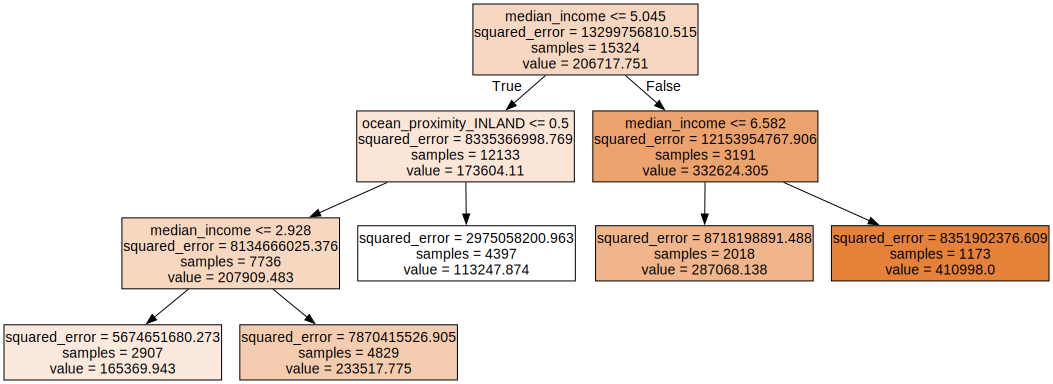

In [55]:
dot_data = tree.export_graphviz(arvore_ccp_alpha, out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graphviz.Source(dot_data)